In [1]:
import pandas as pd 
!pip install Biopython
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import matplotlib.pyplot as plt 
import random
import numpy as np

FUNCTIONS/RETURNED:

get_hiv_bait()- gets the sequences and names of the bait and puts it into a pandas DataFrame, returns hiv_bait_df 

get_prey()- gets the prey sequences and ids and puts it into a pandas DataFrame, returns human_prey_df

get_hiv_pos()- positive- bait name, prey name, bait sequence, prey sequence, returns hiv_ppi_pos

get_hiv_neg()- random bait seq assigned to random prey seq, returns hiv_ppi_neg

hiv_prey_pairwise()- calculates pairwise scores for positive and negative dataset + concats, returns train_data

In [2]:
ppi_data = pd.read_csv('ppi_multipathogen_wCoV2.txt',sep='\t')
ppi_data.dataset.unique()

array(['Chlamydia-HEK293T', 'Dengue-HEK293T', 'Ebola-HEK293T',
       'Ebola-HUH7', 'EV71-HEK293T', 'HBV-HUH7', 'HCV-HEK293T',
       'HCV-HUH7', 'HIV-HEK293T', 'HIV-Jurkat', 'HPV-C33A', 'HPV-HEK293T',
       'HPV-Het1A', 'IAV-A549', 'IAV-HTBE', 'IAV-THP1', 'KSHV-HEK293T',
       'Mtb-HEK293T', 'WNV-HEK293T', 'Zika-HEK293T', 'SARS-CoV2-HEK293T'],
      dtype=object)

In [3]:
#HIV (BAIT) SEQUENCES 
#parsing and taking out seq from fasta file
#This function gets the sequences and names of the bait and puts it into a pandas DataFrame 

def get_hiv_bait():
    hiv_bait_dic = {'Bait':[],'Sequences':[]}

    for record in SeqIO.parse("hiv_bait_fasta1.txt","fasta"):
        sub_id = record.id.split('|')
        sub_id = sub_id[2].split('_')[0]

        hiv_bait_dic['Bait'].append(sub_id)
        hiv_bait_dic['Sequences'].append(str(record.seq))

    #concatenate
    hiv_bait_dic['Bait'].append("MA")
    hiv_bait_dic['Sequences'].append("MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAVNPGLLETSEGCRQILGQLQPSLQTGSEELRSLYNTVATLYCVHQRIEIKDTKEALDKIEEEQNKSKKKAQQAAADTGHSNQVSQNYGAAAGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic['Bait'].append("CA")
    hiv_bait_dic['Sequences'].append("MPIVQNIQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEGATPQDLNTMLNTVGGHQAAMQMLKETINEEAAEWDRVHPVHAGPIAPGQMREPRGSDIAGTTSTLQEQIGWMTNNPPIPVGEIYKRWIILGLNKIVRMYSPTSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANPDCKTILKALGPAATLEEMMTACQGVGGPGHKARVLGAAAGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic['Bait'].append("NC")
    hiv_bait_dic['Sequences'].append("MQRGNFRNQRKIVKCFNCGKEGHTARNCRAPRKKGCWKCGKEGHQMKDCTERQANGAAAGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic['Bait'].append("P6")
    hiv_bait_dic['Sequences'].append("MLQSRPEPTAPPEESFRSGVETTTPPQKQEPIDKELYPLTSLRSLFGNDPSSQGAAAGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic["Bait"].append("PR")
    hiv_bait_dic["Sequences"].append("MPQITLWQRPLVTIKIGGQLKEALLNTGADDTVLEEMNLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNFGAAAGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic["Bait"].append("RT")
    hiv_bait_dic["Sequences"].append("MPISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKQKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQCSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVRQLCKLLRGTKALTEVVPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMKGAHTNDVKQLTEAVQKIATESIVIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDGLVSAGIRKVLGAAAGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic["Bait"].append("IN")
    hiv_bait_dic["Sequences"].append("MAFLDGIDKAQEEHEKYHSNWRAMASDFNLPPVVAKEIVASCDKCQLKGEAMHGQVDCSPGIWQLDCTHLEGKVILVAVHVASGYIEAEVIPAETGQETAYFLLKLAGRWPVKTVHTDNGSNFTSTTVKAACWWAGIKQEFGIPYNPQSQGVIESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFKRKGGIGGYSAGERIVDIIATDIQTKELQKQITKIQNFRVYYRDSRDPVWKGPAKLLWKGEGAVVIQDNSDIKVVPRRKAKIIRDYGKQMAGDDCVASRQDEDGAAAGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic["Bait"].append("GP160")
    hiv_bait_dic["Sequences"].append("MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWKEATTTLLCASDAKAYDTEVHNVWATHACVPTDPNPQEVVLVNVTENFDMWKNDMVEQMHEDIISLWDQSLKPCVKLTPLCVSLKCTDLKNDTNTNSSSGRMIMEKGEIKNCSFNISTSIRGKVQKEYAFFYKLDIIPIDNDTTSYSLTSCNTSVITQACPKVSFEPIPNHYCAPAGFTILKCNNKTFNGTGPCTNVSTVQCTHGIRPVVSTQLLLNGSLAEEEVVIRSVNFTDNAKTIIVQLNTSVEINCTRPNNNTRKRIRIQRGPGRAFVTIGKIGNMRQAHCNISRAKWNNTLKQIDSKLREQFGNNKTIIFKQSSGGDPEIVTHSFNCGGEFFYCNSTQLFNSTWFNSTWSTEGSNNTEGSDTITLPCRIKQIINMWQKVGKAMYAPPISGQIRCSSNITGLLLTRDGGNSNNESEIFRLGGGDMRDNWRSELYKYKVVKIEPLGVAPTKAKRRVVQREKRAVGIGALFLGFLGAAGSTMGAASMTLTVQARQLLSGIVQQQNNLLRAIEAQQHLLQLTVWGIKQLQARTLAVERYLKDQQLLGIWGCSGKLICTTAVPWNASWSNKSLEQIWNHTTWMEWDREINNYTSLIHSLIEESQNQQEKNEQELLELDKWASLWNWFNITNWLWYIKLFIMIVGGLVGLRIVFAVLSIVNRVRQGYSPLSFQTHLPTPRGPDRPEGIEEEGGERDRDRSIRLVNGSLALIWDDLRSLCLFSYHRLRDLLLIVTRIVELLGRRGWEALKYWWNLLQYWSQELKNSAVSLLNATAIAVAEGTDRVIEVVQGACRAIRHIPRRIRQGLERILLGLEGGGGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic["Bait"].append("GP120")
    hiv_bait_dic["Sequences"].append("MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWKEATTTLLCASDAKAYDTEVHNVWATHACVPTDPNPQEVVLVNVTENFDMWKNDMVEQMHEDIISLWDQSLKPCVKLTPLCVSLKCTDLKNDTNTNSSSGRMIMEKGEIKNCSFNISTSIRGKVQKEYAFFYKLDIIPIDNDTTSYSLTSCNTSVITQACPKVSFEPIPNHYCAPAGFTILKCNNKTFNGTGPCTNVSTVQCTHGIRPVVSTQLLLNGSLAEEEVVIRSVNFTDNAKTIIVQLNTSVEINCTRPNNNTRKRIRIQRGPGRAFVTIGKIGNMRQAHCNISRAKWNNTLKQIDSKLREQFGNNKTIIFKQSSGGDPEIVTHSFNCGGEFFYCNSTQLFNSTWFNSTWSTEGSNNTEGSDTITLPCRIKQIINMWQKVGKAMYAPPISGQIRCSSNITGLLLTRDGGNSNNESEIFRLGGGDMRDNWRSELYKYKVVKIEPLGVAPTKAKRRVVQREKRAVGIGALFLGFLGAAGSTMGAASMTGLEGGGGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_dic["Bait"].append("GP41")
    hiv_bait_dic["Sequences"].append("MTMKTIIALSYIFCLVFAMLTVQARQLLSGIVQQQNNLLRAIEAQQHLLQLTVWGIKQLQARILAVERYLKDQQLLGIWGCSGKLICTTAVPWNASWSNKSLEQIWNHTTWMEWDREINNYTSLIHSLIEESQNQQEKNEQELLELDKWASLWNWFNITNWLWYIKLFIMIVGGLVGLRIVFAVLSIVNRVRQGYSPLSFQTHLPTPRGPDRPEGIEEEGGERDRDRSIRLVNGSLALIWDDLRSLCLFSYHRLRDLLLIVTRIVELLGRRGWEALKYWWNLLQYWSQELKNSAVSLLNATAIAVAEGTDRVIEVVQGACRAIRHIPRRIRQGLERILLGLEGGGGWSHPQFEKGGGSGGGSGGGSWSHPQFEKGENLYFQGADYKDHDGDYKDHDIDYKDDDDK")

    hiv_bait_df = pd.DataFrame(data=hiv_bait_dic)

    return hiv_bait_df

hiv_bait_df=get_hiv_bait()

In [4]:
#HUMAN PROTEOME (PREY) SEQUENCES 
#This function gets the prey sequences and ids and puts it into a pandas DataFrame 

def get_prey():
    human_prey_dic={'Prey':[],'Prey_Sequence':[]}
    for record in SeqIO.parse("human_proteomes.fasta","fasta"):
        sub_id = record.id.split('|')
        sub_id = sub_id[1]

        human_prey_dic['Prey'].append(sub_id)
        human_prey_dic['Prey_Sequence'].append(str(record.seq))

    human_prey_df = pd.DataFrame(data=human_prey_dic)

    return human_prey_df

human_prey_df=get_prey()

In [5]:
#POSITIVE SAMPLE DATAFRAME
#DATAFRAME WENT FROM 114 --> 93 AFTER DROPPING NAN VALUES 
#build positive and negative dataset 
#positive- bait name, prey name, bait sequence, prey sequence 

def get_hiv_pos():
    
    #Bait and Prey names: only for HEK293T and have Mist score higher than .75
    hiv_ppi_pos = ppi_data[(ppi_data.dataset=='HIV-HEK293T') & (ppi_data['MIST'] >= 0.75)][["Bait","Prey"]]

    #bait sequence 
    hiv_ppi_pos['Bait_Sequence']=hiv_ppi_pos['Bait'].map(hiv_bait_df.set_index('Bait')['Sequences'])

    #prey sequence- check if sequence from all human protiens exists in bait_prey_names
    hiv_ppi_pos['Prey_Sequence']=hiv_ppi_pos['Prey'].map(human_prey_df.set_index('Prey')['Prey_Sequence'])

    #replacing bait sequence nan values 
    bait_seq_nan = hiv_ppi_pos[hiv_ppi_pos["Bait_Sequence"].isnull()].index.tolist()
    for i in range(len(bait_seq_nan)):
        index = hiv_ppi_pos.loc[bait_seq_nan[i],'Bait']
        hiv_ppi_pos['Bait_Sequence']=hiv_ppi_pos['Bait'].map(hiv_bait_df.set_index(index)['Sequences'])

    #removing prey sequence nan values 
    hiv_ppi_pos=hiv_ppi_pos[hiv_ppi_pos["Prey_Sequence"].notna()]
    hiv_ppi_pos['y_true'] = '1'
    hiv_ppi_pos=hiv_ppi_pos.reset_index(drop=True)

    return hiv_ppi_pos

hiv_ppi_pos=get_hiv_pos()

In [6]:
#NEGATIVE DATAFRAME - random bait seq assigned to random prey seq

def get_hiv_neg():
    
    #get random batch of prey sequences from get_prey() function
    #hiv_ppi_neg = get_prey().sample(n=140) 
    hiv_ppi_neg = get_prey().head(140)
    
    #make bait sequences into a list
    bait_name_list = get_hiv_bait()["Bait"].tolist()
    bait_seq_list = get_hiv_bait()["Sequences"].tolist()
    
    #create new column in hiv_ppi_neg
    hiv_ppi_neg["Bait"] = ""
    hiv_ppi_neg["Bait_Sequence"] = ""
    
    #iterate through rows and assign random bait sequence 
    for index, row in hiv_ppi_neg.iterrows():
        hiv_ppi_neg.loc[index, "Bait"] = random.choice(bait_name_list)
        hiv_ppi_neg['Bait_Sequence']=hiv_ppi_neg['Bait'].map(get_hiv_bait().set_index("Bait")['Sequences'])
        #hiv_ppi_neg.loc[index, "Bait_Sequence"] = random.choice(bait_seq_list)
    
    hiv_ppi_neg['y_true'] = '0'
    hiv_ppi_neg=hiv_ppi_neg.reset_index(drop=True)
    
    return hiv_ppi_neg

hiv_ppi_neg=get_hiv_neg()

SEQUENCE ALIGNMENT TRIALS- SKCIT BIO, SKBIO

In [7]:
#STRIPED SMITH WATERMAN FOR ALIGNMENT
#not using 
hiv_bait_df=get_hiv_bait()
human_prey_df=get_prey()
hiv_ppi_pos=get_hiv_pos()
hiv_ppi_neg=get_hiv_neg()

from skbio.alignment import StripedSmithWaterman

#StripedSmithWaterman for positive dataset 
pos_scores = []

for index in range(len(hiv_ppi_pos.index)):
    query = StripedSmithWaterman(hiv_ppi_pos["Bait_Sequence"][hiv_ppi_pos.index[index]])
    alignment = query(hiv_ppi_pos["Prey_Sequence"][hiv_ppi_pos.index[index]])
    pos_scores.append(alignment['optimal_alignment_score'])

#StripedSmithWaterman for positive dataset 
neg_scores = []
for index in range(len(hiv_ppi_neg.index)):
    query = StripedSmithWaterman(hiv_ppi_neg["Bait_Sequence"][hiv_ppi_neg.index[index]])
    alignment = query(hiv_ppi_neg["Prey_Sequence"][hiv_ppi_neg.index[index]])
    neg_scores.append(alignment['optimal_alignment_score'])

final seq alignment method? GLOBAL

In [8]:
def hiv_prey_pairwise():
    hiv_ppi_pos = get_hiv_pos()
    hiv_ppi_neg = get_hiv_neg()
    hiv_ppi_pos["Score"] = ''
    hiv_ppi_neg["Score"] = ''
    pos_scores = []
    neg_scores = []

    for index in range(len(hiv_ppi_pos.index)):
        alignments = pairwise2.align.globalxx(str(hiv_ppi_pos["Bait_Sequence"][hiv_ppi_pos.index[index]]), str(hiv_ppi_pos["Prey_Sequence"][hiv_ppi_pos.index[index]]))
        pos_scores.append(alignments[0][2])
        hiv_ppi_pos.loc[index,"Score"] = alignments[0][2]
        

    for index in range(len(hiv_ppi_neg)):
        alignments = pairwise2.align.globalxx(str(hiv_ppi_neg["Bait_Sequence"][hiv_ppi_neg.index[index]]), str(hiv_ppi_neg["Prey_Sequence"][hiv_ppi_neg.index[index]]))
        neg_scores.append(alignments[0][2])
        hiv_ppi_neg.loc[index,"Score"] = alignments[0][2]
    
    
    train_data=pd.concat([hiv_ppi_pos,hiv_ppi_neg],axis=0)
    train_data.reset_index(drop=True,inplace=True)
    
    return train_data

train_data = hiv_prey_pairwise()


In [9]:
#adding prediction variables to train_data 

#bait length 
train_data["Bait_Length"] = ""
for index in range(len(train_data.index)):
    train_data.loc[index,"Bait_Length"] = len(train_data.loc[index,"Bait_Sequence"])

#molecular weight
weight_df = hiv_bait_df
weight_df["Weight"]=[162041.90,11561.13,22512.91,11370.85,13004.60,23306.28,
            54888.92,5166.54,21784.97,32585.69,13300.50,12790.61,
            17825.10,71293.30,39276.11,104292.89,67018.88,46558.14]
train_data["Weight"]=""
train_data["Weight"]=train_data["Bait"].map(weight_df.set_index("Bait")["Weight"])

#amino acid categories 
def amino_acid_classify(seq):
    charged = 0
    polar = 0
    amphiatic = 0
    hydrophobic = 0
    
    for i in seq:
        if i in ['R','K','D','E']:
            charged +=1
        elif i in ['Q','N','H','S','T','Y','C']:
            polar +=1
        elif i in ['W','Y','M']:
            amphiatic +=1
        elif i in ['A','I','L','M','F','V','P','G']:
            hydrophobic +=1
    return [charged, polar, amphiatic, hydrophobic]

train_data["Bait_Charged"]= ""
train_data["Bait_Polar"]= ""
train_data["Bait_Amph"]= ""
train_data["Bait_Hydro"]= ""

train_data["Prey_Charged"]= ""
train_data["Prey_Polar"]= ""
train_data["Prey_Amph"]= ""
train_data["Prey_Hydro"]= ""


for index in range(len(train_data.index)):
    bait_amino_values = amino_acid_classify(train_data.loc[index,"Bait_Sequence"])
    train_data.loc[index,"Bait_Charged"] = bait_amino_values[0]
    train_data.loc[index,"Bait_Polar"] = bait_amino_values[1]
    train_data.loc[index,"Bait_Amph"] = bait_amino_values[2]
    train_data.loc[index,"Bait_Hydro"] = bait_amino_values[3]
    
    prey_amino_values = amino_acid_classify(train_data.loc[index,"Prey_Sequence"])
    train_data.loc[index,"Prey_Charged"]= prey_amino_values[0]
    train_data.loc[index,"Prey_Polar"]= prey_amino_values[1]
    train_data.loc[index,"Prey_Amph"]= prey_amino_values[2]
    train_data.loc[index,"Prey_Hydro"]= prey_amino_values[3]

questions:
how to split into training and testing?
where to get data for other predictive variables?

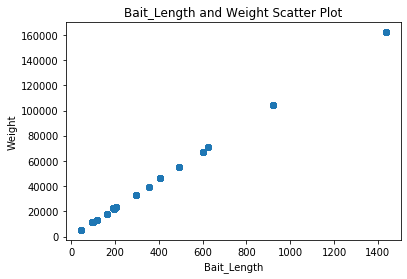

In [10]:
plt.scatter(train_data["Bait_Length"],train_data["Weight"])
plt.title("Bait_Length and Weight Scatter Plot")
plt.xlabel("Bait_Length")
plt.ylabel("Weight")
plt.show();

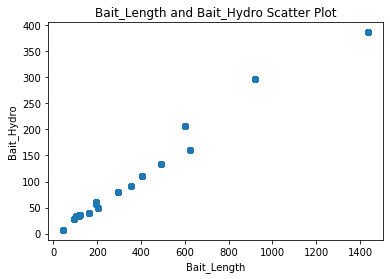

In [11]:
plt.scatter(train_data["Bait_Length"],train_data["Bait_Polar"])
plt.title("Bait_Length and Bait_Hydro Scatter Plot")
plt.xlabel("Bait_Length")
plt.ylabel("Bait_Hydro")
plt.show();

In [12]:
from sklearn import svm 
from sklearn.model_selection import train_test_split

#split data into X_train,X_test,y_train,y_test
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data['y_true'], stratify=train_data['y_true'], test_size=0.2)
#initialize classifier
classifier = svm.SVC(kernel='linear')

In [13]:
classifier.fit(X_train.iloc[:,5:],y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
prediction = classifier.predict(X_test.iloc[:,5:])

In [15]:
accuracy = classifier.score(X_test.iloc[:, 5:], y_test)

In [16]:
accuracy

0.851063829787234

In [17]:
from sklearn.metrics import plot_confusion_matrix

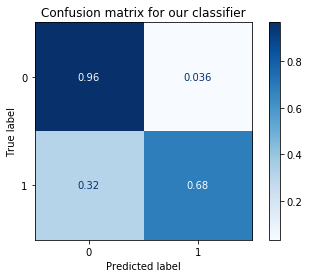

In [18]:
matrix = plot_confusion_matrix(classifier, X_test.iloc[:,5:], y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [19]:
#SVM ON SARS DATASET
#classifier.fit(train_data.iloc[:,5:],train_data['y_true'])

In [20]:
#load sars dataset for X_test
# cov_data = open('sars_df.txt','r')
# cov_data = cov_data.read()

In [21]:
# prediction = classifier.predict(X_test.iloc[:,5:])